## Import necessary libraries

In [1]:
import numpy as np

import matplotlib.pyplot as plt

params = {'legend.fontsize': 24,
            'figure.figsize' : (10, 10),
            'axes.labelsize'  : 24,
            'axes.titlesize'  : 24,
            'xtick.labelsize' : 22,
            'ytick.labelsize' : 22,
            'pdf.fonttype'    : 42}
plt.rcParams.update(params)

We are minimizing the sum of convex functions $f_i:=\frac{1}{2}(x-i)^2$ for $i\in\{1,\dots,5\}$.
Recall that the gradient is $\nabla f_i(x)=(x-i)$

## Define graph

In [2]:
num_iters  = 10000
eta = 0.001

E = np.zeros((5,5))
E[0,1], E[1,0] = 1., 1.
E[1,2], E[2,1] = 1., 1.
E[1,3], E[3,1] = 1., 1.
E[2,3], E[3,2] = 1., 1.
E[2,4], E[4,2] = 1., 1.

D = np.sum(E,0)

W = np.zeros((5,5))

for i in range(5):
    for j in range(i+1,5):
        W[i,j] = E[i,j]/(1+max(D[i],D[j]))
        W[j,i] = W[i,j]
    
    W[i,i] = 1-np.sum(W[i,:])

In [3]:
W

array([[0.75, 0.25, 0.  , 0.  , 0.  ],
       [0.25, 0.25, 0.25, 0.25, 0.  ],
       [0.  , 0.25, 0.25, 0.25, 0.25],
       [0.  , 0.25, 0.25, 0.5 , 0.  ],
       [0.  , 0.  , 0.25, 0.  , 0.75]])

## First-order DGD algorithm

In [4]:
x = np.random.randn(5,)

x_vals      = np.zeros((num_iters+1,5))
x_vals[0,:] = x

z0 = np.linspace(1,5,5)

for n in range(num_iters):
    z = W[:-1,:]@x
    x[:-1] = z - eta*(z-z0[:-1])
    x[-1]  = x[-1] - eta*(x[-1]-z0[-1])
    x_vals[n+1,:] = x

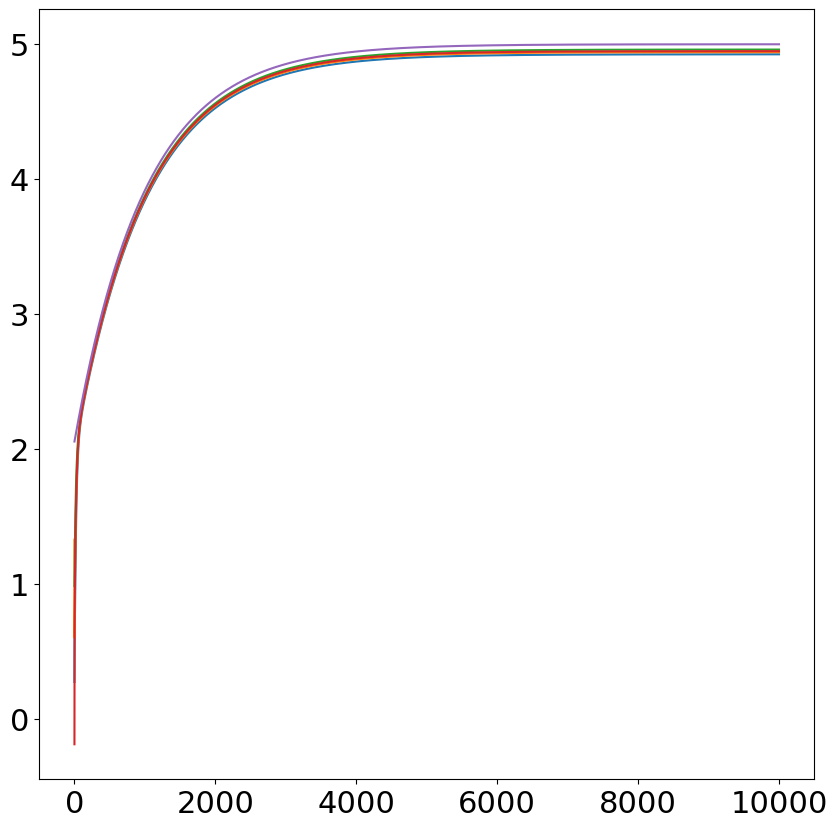

In [5]:
plt.plot(x_vals)

In [6]:
def MyClip(z, tau=0.1):
    nz = np.linalg.norm(z)
    if nz <= 1e-5:
        return 0
    else:
        return min(1, tau/np.linalg.norm(z))*z

In [9]:
x = np.random.randn(5,)

x_vals      = np.zeros((num_iters+1,5))
x_vals[0,:] = x

z0 = np.linspace(1,5,5)

for n in range(num_iters):
    z = np.zeros((4,))
    for i in range(4):
        for j in range(5):
            z[i] += W[i,j]*(x[i]+MyClip(x[j]-x[i], tau=0.01))
    x[:-1] = z - eta*(z-z0[:-1])
    x[-1]  = x[-1] - eta*(x[-1]-z0[-1])
    x_vals[n+1,:] = x

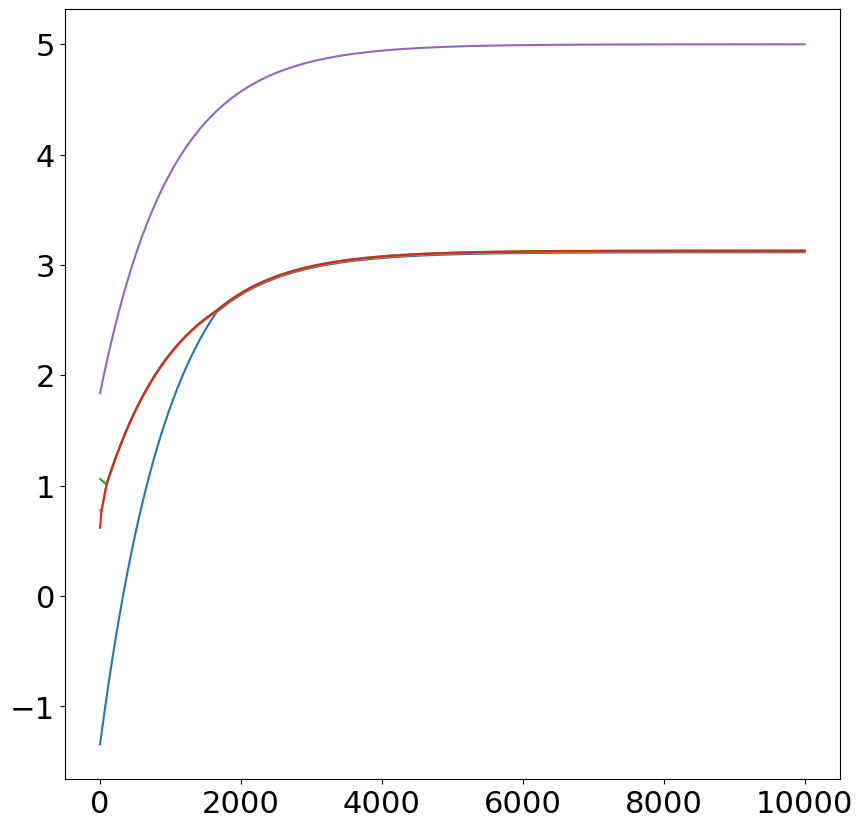

In [10]:
plt.plot(x_vals)